In [158]:
import sys

In [159]:
sys.path.append('../../source/')

In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [161]:
%matplotlib inline

In [162]:
import seaborn as sns

In [163]:
sns.set_style(style='darkgrid')

Exploratory Data Analysis

In [164]:
from Hedge import Hedge

Initialize an Hedge instance within which stock data are stored.

In [165]:
hedge_all = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2013-01-01', enddate='2014-12-31')
hedge = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2013-01-01', enddate='2013-12-31')
hedge_2 = Hedge('../../data/all_stocks.csv','../../data/spy.csv', begindate='2014-01-01', enddate='2014-12-31')


In [166]:
hedge_all.generateRandomMarket(40)

array(['ARI', 'FCF', 'SAIA', 'HOLI', 'FCF', 'AMID', 'IIIN', 'EFR', 'GURE',
       'FRD', 'NWBO', 'CALL', 'HTH', 'ININ', 'VNR', 'FWRD', 'MYD', 'JE',
       'ESMC', 'ISSC', 'WHR', 'NWE', 'NLST', 'TGTX', 'AXDX', 'GSL', 'ACXM',
       'SPEX', 'LBF', 'VECO', 'ESGR', 'SFST', 'PNFP', 'FNGN', 'PACB',
       'EZPW', 'CHEF', 'DJCO', 'CMO', 'PCQ'], dtype=object)

In [167]:
hedge_all.generateRandomPort()

array(['SWHC', 'ARIA', 'CBR', 'SPN', 'NAII', 'ZUMZ', 'HIX', 'JCS', 'RRC',
       'AMGN', 'VRA', 'ACHC', 'ELY', 'CDNS', 'TUMI', 'NURO', 'RCG', 'CCU',
       'MOS', 'OHRP'], dtype=object)

In [168]:
# hedge.market = hedge_all.market[:]
# hedge_2.market = hedge_all.market[:]
# hedge.portfolio = hedge_all.portfolio[:]
# hedge_2.portfolio = hedge_all.portfolio[:]

In [169]:
hedge.market = ['SAN', 'HSTM', 'IHD', 'FTEK', 'F', 'AAL', 'VHC', 'JOB', 'PRSC',
       'MIY', 'CERS', 'BIN', 'MYL', 'RBCN', 'ARIA', 'CHEV', 'SWC', 'BOXC',
       'USAP', 'GBLI', 'PDI', 'ESXB', 'JPM', 'FDT', 'HOLX', 'DV', 'DNI',
       'CBMG', 'CPAH', 'TROW', 'FICO', 'CEB', 'TOF', 'SWC', 'ZGNX', 'BTG',
       'HEP', 'RHI', 'MUE', 'WTR']
hedge_2.market = ['SAN', 'HSTM', 'IHD', 'FTEK', 'F', 'AAL', 'VHC', 'JOB', 'PRSC',
       'MIY', 'CERS', 'BIN', 'MYL', 'RBCN', 'ARIA', 'CHEV', 'SWC', 'BOXC',
       'USAP', 'GBLI', 'PDI', 'ESXB', 'JPM', 'FDT', 'HOLX', 'DV', 'DNI',
       'CBMG', 'CPAH', 'TROW', 'FICO', 'CEB', 'TOF', 'SWC', 'ZGNX', 'BTG',
       'HEP', 'RHI', 'MUE', 'WTR']
hedge.portfolio = ['MRCC', 'HMPR', 'AIG', 'MLSS', 'RELV', 'BSPM', 'MYJ', 'SGEN',
       'SILC', 'SGOC', 'XYL', 'BGC', 'PRKR', 'ERF', 'MMT', 'MEET', 'SCS',
       'LINE', 'AFL', 'STL']
hedge_2.portfolio = ['MRCC', 'HMPR', 'AIG', 'MLSS', 'RELV', 'BSPM', 'MYJ', 'SGEN',
       'SILC', 'SGOC', 'XYL', 'BGC', 'PRKR', 'ERF', 'MMT', 'MEET', 'SCS',
       'LINE', 'AFL', 'STL']

Plotting the market data - or SPY (SPDR S&P 500 ETF Trust)

In [170]:
import pandas as pd

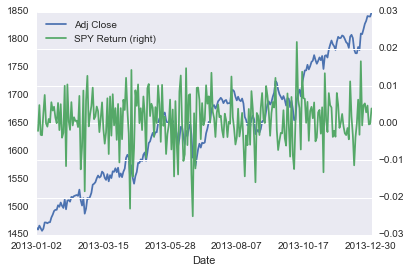

In [171]:
spydf = pd.DataFrame(hedge.spy.copy())
spydf.rename(columns={'Adj Close': 'SPY'})
spydf['SPY Return'] = spydf.pct_change()
spydf.plot(secondary_y='SPY Return')
plt.xlabel('Date')
# plt.savefig('./Figures/0404/SPY.png')

Plot portfolio data.

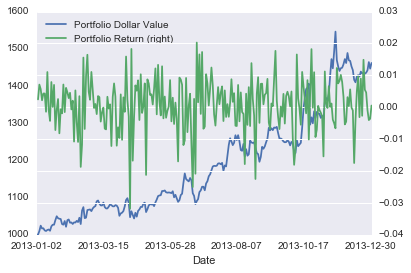

In [172]:
portdf = pd.DataFrame([hedge.dollar_portfolio_sum, hedge.dollar_market_sum_ret]).transpose()
portdf.columns = ['Portfolio Dollar Value', 'Portfolio Return']
portdf.plot(secondary_y='Portfolio Return')
plt.xlabel('Date')
# plt.savefig('./Figures/0404/Port.png')

Plot Initial Market

In [173]:
# hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
#        'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
#        'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
#        'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
#        'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

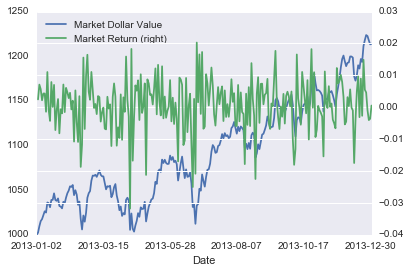

In [174]:
marketdf = pd.DataFrame([hedge.dollar_market_sum, hedge.dollar_market_sum_ret]).transpose()
marketdf.columns = ['Market Dollar Value', 'Market Return']
marketdf.plot(secondary_y='Market Return')
plt.xlabel('Date')
# plt.savefig('./Figures/0404/Initial_market.png')

---
Simulated annealing

In [175]:
import Simulation
from energy_functions import *

In [176]:
from BetaUtils import get_beta, beta_hedging_ret, cum_ret

In [177]:
%%time
# hedge.market = ['GPX', 'GRMN', 'MPWR', 'ENR', 'CTHR', 'PRFZ', 'SUMR', 'CUBE',
#        'ACTS', 'ANF', 'MYI', 'SON', 'SSL', 'PW', 'KT', 'TWN', 'IPWR',
#        'AAN', 'CASH', 'DISCA', 'RFP', 'HPS', 'WMB', 'VRSN', 'ETN', 'WPZ',
#        'RAI', 'BOXC', 'ARCI', 'EMN', 'LMOS', 'EXPD', 'NQS', 'GB', 'KNOP',
#        'CNL', 'ENDP', 'SPSC', 'SCVL', 'EPAY']

st_sharpe, bm_sharpe = Simulation.simulated_annealing(hedge, 
                                                      init_temp=0.01, 
                                                      min_temp=0.001, 
                                                      cool_by=0.9, 
                                                      reanneal=10, 
                                                      num_iter=2000, 
                                                      energy_func=correlation)





#### Change your energy function here


0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990CPU times: user 18min 52s, sys: 17.8 s, total: 19min 10s
Wall time: 10min 32s



In [178]:
st_sharpe_2000, bm_sharpe_2000 = st_sharpe, bm_sharpe

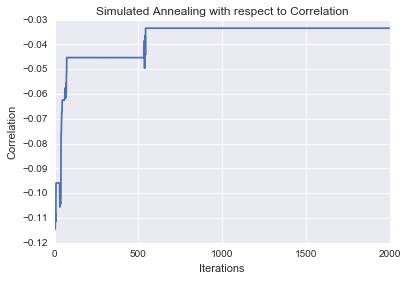

In [189]:
plt.plot(-st_sharpe)
plt.xlabel('Iterations')
plt.ylabel('Correlation')
plt.title('Simulated Annealing with respect to Correlation')
# plt.savefig('./Figures/0404/Sharpe_sim.png')

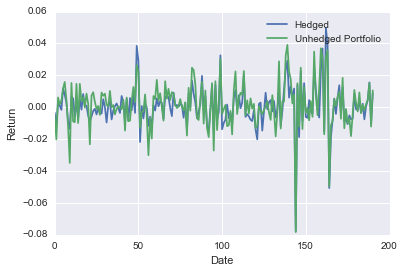

In [181]:
hedge.market = bm_sharpe

_, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)
bhr = beta_hedging_ret(betas[1:], hedge.dollar_portfolio_sum_ret[61:], hedge.dollar_market_sum_ret[61:])

_, betas_sp = get_beta(hedge.dollar_portfolio_sum_ret, hedge.spy.pct_change())
bhr_sp = beta_hedging_ret(betas[1:], hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:])

plt.plot(bhr, label = 'Hedged')
plt.plot(hedge.dollar_portfolio_sum_ret[61:].values, label = 'Unhedged Portfolio')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
# plt.savefig('./Figures/0404/Sharpe_Ret.png')

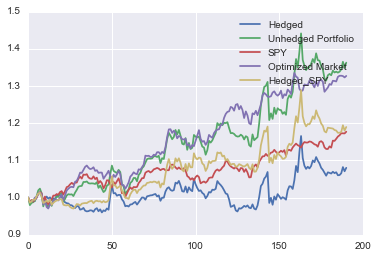

In [182]:
plt.plot(cum_ret(bhr), label = 'Hedged')
plt.plot(cum_ret(hedge.dollar_portfolio_sum_ret[61:].values), label = 'Unhedged Portfolio')
plt.plot(cum_ret(hedge.spy.pct_change()[61:].values), label = 'SPY')
plt.plot(cum_ret(hedge.dollar_market_sum_ret[61:].values), label = 'Optimized Market')
plt.plot(cum_ret(bhr_sp), label = 'Hedged_SPY')
plt.legend()
# plt.savefig('./Figures/0404/Sharpe_cum_ret.png')

In [183]:
print 'Hedged Sharpe:', -neg_sharpe((bhr))
print 'Hedged against SPY Sharpe:', -neg_sharpe(bhr_sp)
print 'Unhedged Sharpe:', -neg_sharpe(hedge.dollar_portfolio_sum_ret[61:])
print
print 'Hedged Correlation:', correlation(bhr, hedge.spy.pct_change()[61:].values)
print 'Hedged against SPY Correlation:', correlation(bhr_sp, hedge.spy.pct_change()[61:].values)
print 'Unhedged Correlation:', correlation(hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:].values)
print 
print 'Hedged Volatility:', volatility(bhr)
print 'Hedged against SPY Volatility:', volatility(bhr_sp)
print 'Unhedged Volatility:', volatility(hedge.dollar_portfolio_sum_ret[61:])
print 
print 'Hedged Returns:', cum_ret(bhr)[-1]
print 'Hedged against SPY Returns:', cum_ret(bhr_sp)[-1]
print 'Unhedged Returns:', cum_ret(hedge.dollar_market_sum_ret[61:])[-1]

Hedged Sharpe: 0.0362780342941
Hedged against SPY Sharpe: 0.0720956724302
Unhedged Sharpe: 0.117847845627

Hedged Correlation: 0.0324759164775
Hedged against SPY Correlation: 0.0222068222791
Unhedged Correlation: 0.396761276859

Hedged Volatility: 0.0129349267696
Hedged against SPY Volatility: 0.013211523332
Unhedged Volatility: 0.0144060723149

Hedged Returns: 1.08006217232
Hedged against SPY Returns: 1.18975044425
Unhedged Returns: 1.3270320546


In [184]:
sharpe_market_hedged = -neg_sharpe((bhr))
sharpe_spy_hedged = -neg_sharpe(bhr_sp)
sharpe_unhedged = -neg_sharpe(hedge.dollar_portfolio_sum_ret[61:])
sharpe_spy = -neg_sharpe(hedge.spy.pct_change()[61:])


correlation_market_hedged = correlation(bhr, hedge.spy.pct_change()[61:].values)
correlation_spy_hedged = correlation(bhr_sp, hedge.spy.pct_change()[61:].values)
correlation_unhedged = correlation(hedge.dollar_portfolio_sum_ret[61:], hedge.spy.pct_change()[61:].values)
correlation_spy = correlation(hedge.spy.pct_change()[61:], hedge.spy.pct_change()[61:].values)


volatility_market_hedged = volatility(bhr)
volatility_spy_hedged = volatility(bhr_sp)
volatility_unhedged = volatility(hedge.dollar_portfolio_sum_ret[61:])
volatility_spy = volatility(hedge.spy.pct_change()[61:])


returns_market_hedged = cum_ret(bhr)[-1] - 1
returns_spy_hedged = cum_ret(bhr_sp)[-1] - 1
returns_unhedged = cum_ret(hedge.dollar_portfolio_sum_ret[61:])[-1] - 1
returns_spy = cum_ret(hedge.spy.pct_change()[61:])[-1] - 1


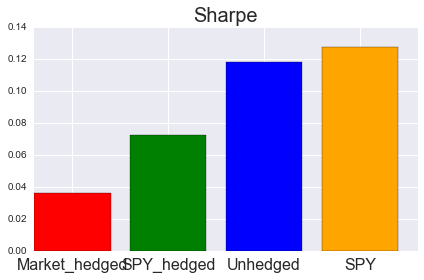

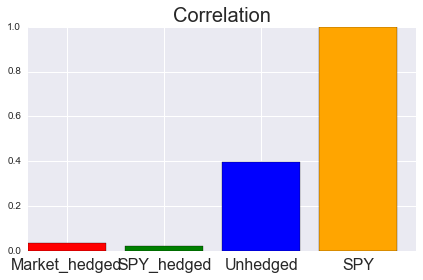

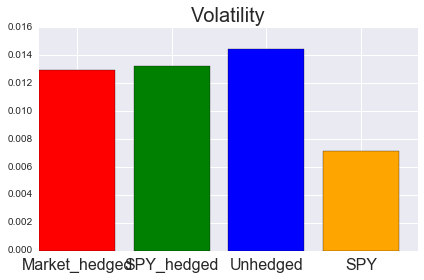

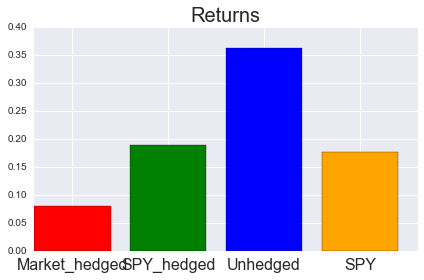

In [185]:
for metric in ['sharpe','correlation','volatility','returns']:
    market_hedged = locals()[metric+'_market_hedged']
    spy_hedged = locals()[metric+'_spy_hedged']
    unhedged = locals()[metric+'_unhedged']
    spy = locals()[metric+'_spy']
    plt.bar([0,1,2,3],[market_hedged, spy_hedged, unhedged, spy], color=['r','g','b','orange'])
    plt.xticks(np.array([0,1,2,3]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged', 'SPY'), fontsize = 16)

    plt.title(metric.capitalize(), fontsize=20)
    plt.tight_layout()
    plt.show()

In [186]:
hedge_2.market = bm_sharpe_300

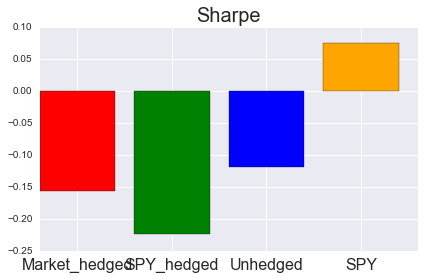

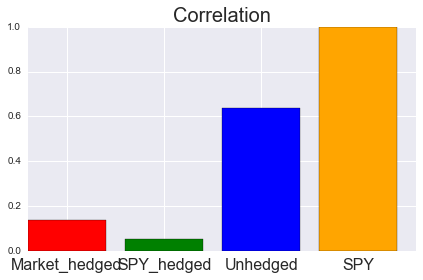

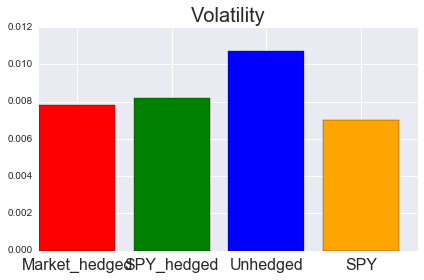

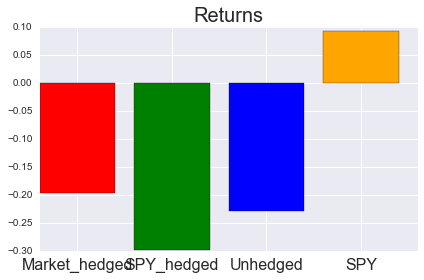

In [187]:
hedge_2.market = bm_sharpe_300

_, betas = get_beta(hedge_2.dollar_portfolio_sum_ret, hedge_2.dollar_market_sum_ret)
bhr = beta_hedging_ret(betas[1:], hedge_2.dollar_portfolio_sum_ret[61:], hedge_2.dollar_market_sum_ret[61:])

_, betas_sp = get_beta(hedge_2.dollar_portfolio_sum_ret, hedge_2.spy.pct_change())
bhr_sp = beta_hedging_ret(betas[1:], hedge_2.dollar_portfolio_sum_ret[61:], hedge_2.spy.pct_change()[61:])


sharpe_market_hedged = -neg_sharpe((bhr))
sharpe_spy_hedged = -neg_sharpe(bhr_sp)
sharpe_unhedged = -neg_sharpe(hedge_2.dollar_portfolio_sum_ret[61:])
sharpe_spy = -neg_sharpe(hedge_2.spy.pct_change()[61:])

correlation_market_hedged = correlation(bhr, hedge_2.spy.pct_change()[61:].values)
correlation_spy_hedged = correlation(bhr_sp, hedge_2.spy.pct_change()[61:].values)
correlation_unhedged = correlation(hedge_2.dollar_portfolio_sum_ret[61:], hedge_2.spy.pct_change()[61:].values)
correlation_spy = correlation(hedge_2.spy.pct_change()[61:], hedge_2.spy.pct_change()[61:].values)

volatility_market_hedged = volatility(bhr)
volatility_spy_hedged = volatility(bhr_sp)
volatility_unhedged = volatility(hedge_2.dollar_portfolio_sum_ret[61:])
volatility_spy = volatility(hedge_2.spy.pct_change()[61:])

returns_market_hedged = cum_ret(bhr)[-1] - 1
returns_spy_hedged = cum_ret(bhr_sp)[-1] - 1
returns_unhedged = cum_ret(hedge_2.dollar_portfolio_sum_ret[61:])[-1] - 1
returns_spy = cum_ret(hedge_2.spy.pct_change()[61:])[-1] - 1



for metric in ['sharpe','correlation','volatility','returns']:
    market_hedged = locals()[metric+'_market_hedged']
    spy_hedged = locals()[metric+'_spy_hedged']
    unhedged = locals()[metric+'_unhedged']
    spy = locals()[metric+'_spy']
    plt.bar([0,1,2,3],[market_hedged, spy_hedged, unhedged, spy], color=['r','g','b','orange'])
    plt.xticks(np.array([0,1,2,3]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged', 'SPY'), fontsize = 16)

    plt.title(metric.capitalize(), fontsize=20)
    plt.tight_layout()
    plt.show()